In [1]:
import pandas as pd
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sonar.all-data", header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
141,0.0707,0.1252,0.1447,0.1644,0.1693,0.0844,0.0715,0.0947,0.1583,0.1247,...,0.0156,0.0197,0.0135,0.0127,0.0138,0.0133,0.0131,0.0154,0.0218,M
161,0.0305,0.0363,0.0214,0.0227,0.0456,0.0665,0.0939,0.0972,0.2535,0.3127,...,0.0200,0.0070,0.0070,0.0086,0.0089,0.0074,0.0042,0.0055,0.0021,M
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
199,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,...,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035,M
194,0.0392,0.0108,0.0267,0.0257,0.0410,0.0491,0.1053,0.1690,0.2105,0.2471,...,0.0083,0.0080,0.0026,0.0079,0.0042,0.0071,0.0044,0.0022,0.0014,M


In [5]:
df.shape

(208, 61)

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [9]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [11]:
df[60] = df[60].map({'M': 0, 'R': 1})
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1


In [13]:
X = df.drop(60, axis=1)
y = df[60]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [15]:
X_train.shape

(156, 60)

In [17]:
# Convert the split arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [19]:
# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

<h4> Train a Neural Network <h4/>

In [22]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(60, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 2)  # Final output layer without activation for raw logits
        )

    def forward(self, x):
        return self.network(x)

In [24]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    train_losses, val_losses, val_accuracies = [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        y_pred, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())
        val_losses.append(val_loss / len(val_loader))
        val_accuracy = accuracy_score(y_true, y_pred)
        val_accuracies.append(val_accuracy)
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
    return train_losses, val_losses, val_accuracies

Epoch 1/20, Train Loss: 0.6871, Val Loss: 0.6705, Val Accuracy: 0.5192
Epoch 2/20, Train Loss: 0.6729, Val Loss: 0.6499, Val Accuracy: 0.5192
Epoch 3/20, Train Loss: 0.6576, Val Loss: 0.6366, Val Accuracy: 0.6538
Epoch 4/20, Train Loss: 0.6411, Val Loss: 0.6145, Val Accuracy: 0.6923
Epoch 5/20, Train Loss: 0.6101, Val Loss: 0.6088, Val Accuracy: 0.7885
Epoch 6/20, Train Loss: 0.5756, Val Loss: 0.5544, Val Accuracy: 0.6923
Epoch 7/20, Train Loss: 0.5496, Val Loss: 0.5330, Val Accuracy: 0.7115
Epoch 8/20, Train Loss: 0.5204, Val Loss: 0.5492, Val Accuracy: 0.7692
Epoch 9/20, Train Loss: 0.4871, Val Loss: 0.5251, Val Accuracy: 0.7885
Epoch 10/20, Train Loss: 0.4611, Val Loss: 0.4845, Val Accuracy: 0.7115
Epoch 11/20, Train Loss: 0.4619, Val Loss: 0.5212, Val Accuracy: 0.7500
Epoch 12/20, Train Loss: 0.4281, Val Loss: 0.4845, Val Accuracy: 0.7885
Epoch 13/20, Train Loss: 0.4031, Val Loss: 0.5155, Val Accuracy: 0.7692
Epoch 14/20, Train Loss: 0.3940, Val Loss: 0.4515, Val Accuracy: 0.7308
E

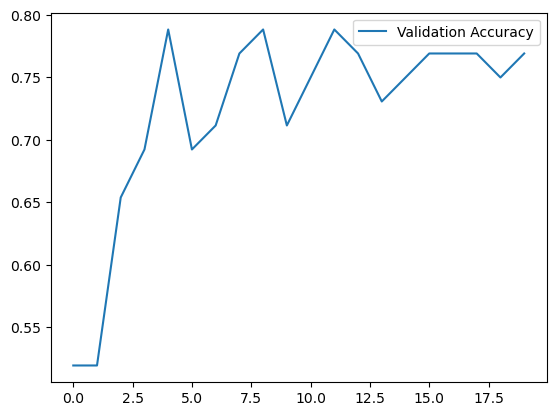

In [26]:
# Initialize and train the model without dropout
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses, val_accuracies = train_model(
    model, train_loader, test_loader, criterion, optimizer, epochs=20
)

plt.plot(val_accuracies, label="Validation Accuracy")
plt.legend()
plt.show()

<h4> Train a Neural Network with Early Stopping <h4/>

In [29]:
# Training function
def train_model_early_stop(model, train_loader, val_loader, criterion, optimizer, epochs=20):
    
    patience = 3
    best_accuracy = 0
    counter = 0
    
    train_losses, val_losses, val_accuracies = [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        y_pred, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())
        val_losses.append(val_loss / len(val_loader))
        val_accuracy = accuracy_score(y_true, y_pred)
        val_accuracies.append(val_accuracy)
        
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")
    
        
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            counter = 0
            torch.save(model.state_dict(), "best_model.pt")
        else:
            counter += 1
            if counter >= patience:
                print(f"Early Stopping at Epoch {epoch+1}")
                break
    
    return train_losses, val_losses, val_accuracies

Epoch 1/20, Train Loss: 0.6877, Val Loss: 0.6728, Val Accuracy: 0.5192
Epoch 2/20, Train Loss: 0.6790, Val Loss: 0.6629, Val Accuracy: 0.5192
Epoch 3/20, Train Loss: 0.6717, Val Loss: 0.6438, Val Accuracy: 0.5192
Epoch 4/20, Train Loss: 0.6539, Val Loss: 0.6253, Val Accuracy: 0.6538
Epoch 5/20, Train Loss: 0.6253, Val Loss: 0.5988, Val Accuracy: 0.6923
Epoch 6/20, Train Loss: 0.5837, Val Loss: 0.5637, Val Accuracy: 0.7308
Epoch 7/20, Train Loss: 0.5448, Val Loss: 0.5836, Val Accuracy: 0.7692
Epoch 8/20, Train Loss: 0.5047, Val Loss: 0.5245, Val Accuracy: 0.7885
Epoch 9/20, Train Loss: 0.4757, Val Loss: 0.5395, Val Accuracy: 0.7500
Epoch 10/20, Train Loss: 0.4573, Val Loss: 0.5439, Val Accuracy: 0.7692
Epoch 11/20, Train Loss: 0.4352, Val Loss: 0.4821, Val Accuracy: 0.6923
Early Stopping at Epoch 11


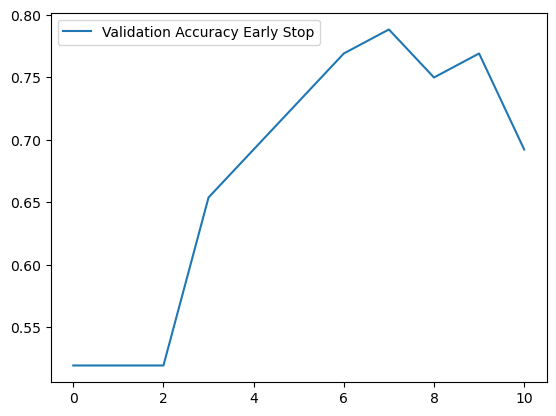

In [31]:
# Initialize and train the model without dropout
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses, val_accuracies = train_model_early_stop(
    model, train_loader, test_loader, criterion, optimizer, epochs=20
)

plt.plot(val_accuracies, label="Validation Accuracy Early Stop")
plt.legend()
plt.show()

In [33]:
model.load_state_dict(torch.load("best_model.pt"))

C:\Users\MY PC\AppData\Local\Temp\ipykernel_9180\349716640.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pt"))


<All keys matched successfully>

In [35]:
# Validation phase
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())
val_accuracy = accuracy_score(y_true, y_pred)
val_accuracy

0.7884615384615384